# Airline Customer Value Analysis With Clustering Algorithms

### Import Libraries and Settings

In [2]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

pd.options.display.max_columns = 100
pd.set_option('display.max_colwidth', None)

# Requirements
print('numpy version : ',np.__version__)
print('pandas version : ',pd.__version__)
print('seaborn version : ',sns.__version__)

numpy version :  1.24.3
pandas version :  2.0.3
seaborn version :  0.12.2


#### Load Dataset (Jupyter Notebook)

In [3]:
df=pd.read_csv('flight.csv')

#### Load Dataset (Google Colab)

In [4]:
# from google.colab import drive
# drive.mount('/content/drive')

# df = pd.read_csv('flight.csv')

# Initial Data Understanding

In [15]:
df.sample(20)

member_no    ffp_date first_flight_date  gender  ffp_tier    work_city  \
29940      16409   2/12/2013         3/24/2013  Female         4      nanjing   
60141      46756   3/27/2012         4/11/2012    Male         4      beijing   
49181      57002    8/8/2008        11/29/2008    Male         4      wujiang   
31421      13896    4/5/2011          4/5/2011    Male         4    changchun   
30887       8007  12/23/2012         1/17/2013  Female         4    guangzhou   
14006       9619   4/21/2006          8/9/2006  Female         5    guangzhou   
59189      42053   1/13/2012         1/13/2012    Male         4      xuchang   
57671      41090   5/11/2011         5/11/2011    Male         4      shantou   
16940      19326   4/12/2007          7/1/2013    Male         4      beijing   
44585      45103  10/25/2010        11/10/2012    Male         4   liangcheng   
5013        6262    2/8/2013          2/8/2013    Male         5  shenyangshi   
8008       10342   2/16/2010         4/16/2010  Female         4    guangzhou   
58660       1407   7/20/2010         6/13/2011    Male         4     wulumuqi   
47917      16511   3/30/2013         3/30/2013    Male         4    zhongqing   
47490      14921    9/8/2011        12/15/2011  Female         4          NaN   
33872      38343  11/27/2005          1/4/2006    Male         4     changsha   
8936       61766   5/29/2011         6/22/2011  Female         4       dalian   
5807       58331   9/18/2009         9/18/2009    Male         5  shenzhenshi   
7822       28691    2/8/2012         4/19/2012    Male         4    guangzhou   
39248        975  12/11/2006         6/25/2007  Female         4    guangzhou   

      work_province work_country   age  load_time  flight_count  bp_sum  \
29940       jiangsu           CN  27.0  3/31/2014             9    7004   
60141       beijing           CN  42.0  3/31/2014             2     879   
49181       jiangsu           CN  36.0  3/31/2014             5    1936   
31421         jilin           CN  44.0  3/31/2014             4    7126   
30887     guangdong           CN  26.0  3/31/2014             3    8017   
14006     guangdong           CN  46.0  3/31/2014            13   17324   
59189         henan           CN  47.0  3/31/2014             2    1113   
57671     guangdong           CN  47.0  3/31/2014             2    1377   
16940       beijing           CN  38.0  3/31/2014            10   14861   
44585     neimenggu           CN  38.0  3/31/2014             4    3930   
5013       liaoning           CN  44.0  3/31/2014            11   29760   
8008      guangdong           CN  28.0  3/31/2014            14   21433   
58660      xinjiang           CN   NaN  3/31/2014             2     886   
47917       sichuan           CN  31.0  3/31/2014             5    2015   
47490           NaN           HK  42.0  3/31/2014             5    1515   
33872         hunan           CN  37.0  3/31/2014            10    4096   
8936       liaoning           CN  29.0  3/31/2014            33   19359   
5807      guangdong           CN  52.0  3/31/2014            46   24913   
7822      guangdong           CN  45.0  3/31/2014            21   19714   
39248     guangdong           CN  41.0  3/31/2014             6    3052   

       sum_yr_1  sum_yr_2  seg_km_sum last_flight_date  last_to_end  \
29940    1024.0    6650.0        9485        1/20/2014           72   
60141    1247.0       0.0        2323        5/15/2012          687   
49181     350.0       0.0        6872         3/1/2013          397   
31421    4015.0    1592.0        8124        7/23/2013          253   
30887     850.0    4000.0       10289         3/9/2014           23   
14006       0.0   18323.0       15308        2/11/2014           50   
59189    1320.0       0.0        1746        2/27/2013          399   
57671    1535.0       0.0        2092       10/24/2012          525   
16940       0.0   12805.0       15894        11/2/2013          151   
44585     960.0    

there are some weird values in these columns, we will see the details later down below

In [6]:
# Initial data transformation :  converting column name to lowercase
df.columns = df.columns.str.lower()

In [14]:
#Checking dataframe information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62988 entries, 0 to 62987
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   member_no          62988 non-null  int64  
 1   ffp_date           62988 non-null  object 
 2   first_flight_date  62988 non-null  object 
 3   gender             62985 non-null  object 
 4   ffp_tier           62988 non-null  int64  
 5   work_city          60719 non-null  object 
 6   work_province      59740 non-null  object 
 7   work_country       62962 non-null  object 
 8   age                62568 non-null  float64
 9   load_time          62988 non-null  object 
 10  flight_count       62988 non-null  int64  
 11  bp_sum             62988 non-null  int64  
 12  sum_yr_1           62437 non-null  float64
 13  sum_yr_2           62850 non-null  float64
 14  seg_km_sum         62988 non-null  int64  
 15  last_flight_date   62988 non-null  object 
 16  last_to_end        629

<b>Features Description</b>

 <pre>
member_no: Member ID
ffp_date: Frequent Flyer Program Join Date
first_flight_date: First Flight Date
gender: Gender
ffp_tier: Frequent Flyer Program Tier
work_city: Work City
work_province: Work Proviince
work_country: Work Country
age: Customer Age
load_time: Date data was taken
flight_count: Number of customer flights
bp_sum: Total basic integral
sum_yr_1: Fare Revenue
sum_yr_2: Votes Prices
seg_km_sum: Total distance (km) flights that have been done
last_flight_date: Last Flight Date
last_to_end: last flight time to last flight order interval
avg_internal: Average time distance
max_interval: Maximum time distance
exchange_count: Number of redemptions
avg_discount: The average discount that customers get
points_sum: The number of points earned by the customer
point_notflight: Points not used by members

Some of the data type are wrong here like features that have date values which are ffp_date, first_flight_date, last_flight_date, load_time, but the data type is assigned as object. There are also features that should have int values but are assigned as float like age, sum_yr_1, sum_yr_2. We will need to convert them later if needed

Now we will check some of the weird values in the dataset that we found before

In [8]:
#Check inconsistent values in work_city feature
for values in df['work_city'].unique():
    print(values)

.
nan
Los Angeles
guiyang
guangzhou
wulumuqishi
wenzhoushi
DRANCY
wenzhou
PARIS
beijing
SAN MARINO
shenzhen
BOWLAND HEIGHTS
wulumuqi
dongguan
VECHEL
zhanjiang
guangzhoushi
Paris
UPLAND
fanyu
changsha
SUMIDA-KU
HK
PUCHONG
hangzhoushi
TORRANCE
chengdu
shishi
LOS ANGELES
shanghai
changshashi
Haarlem
MANTES LA VILLE
yangjiang
fuzhou
shenzhenshi
zhongqing
nanning
SIPASDENA
Zwijndrecht
xianggang
zhuhai
changchun
zhongshan
ANDE
Glendale
Suwanee
CRONULLA
shenyang
wuhan
shanghaishi
VALINDA
shantoushi
dalian
AMSTELVEEN
Escondido
guangzhoushitianhequ
COVINA
CULVER CITY
dunhua
MEXICO
huizhou
ROWLAND HEIGHTS
wuhanshi
CORALGABLES
shantou
haerbin
hetian
zhengzhoushi
Cerritos
zhengzhou
kelamayi
wu
hefei
NEYAGAWA
MENAI
Ibaraki-shi
wusu
ISEHARA
beijingshi
shunde
nansha
luoyang
changchunshi
jilinshi
foshan
ADACHI-KU
FUJIEDA-SHI
shanshanxian
MONTREUJL
KASAI
AKAIWA CITY
PASADAERA
NISHINOMIYA-CITY
yanji
Sittard
changji
NISKAYUNA
pasadena
langfang
hangzhou
hamishi
Hong Kong
lushan
fushun
guilin
VIC
shenyangs

In [9]:
#Check inconsistent values in work_province feature
for values in df['work_province'].unique():
    print(values)

beijing
CA
guizhou
guangdong
xinjiang
zhejiang
nan
PARIS
.
CALIFORNIA
NORD BRABANT
FRANCE
guangdongsheng
hunan
TOKYO-TO
HK
Selangor Darul Ehsan
sichuan
fujian
VIC
shanghai
Noord-Holland
FR
zhongqing
guangxi
CA91030
ZUID HOLLAND
xianggang
jilin
ANDE
GA
NSW
LA
liaoning
hubei
NOORD HOLLAND
IIE DE FRANCE
0
hubeisheng
FL
heilongjiang
henansheng
California
henan
ile de france
shanghaishi
anhui
OSAKAFU
SYDNEY
Osaka
KANGAWA
jilinsheng
guangzhou
SHIZUOKA-KEN
HYOGO
OKAYAMA
LIMBURG
NW
hebeisheng
Hong Kong
AU
Toyama-ken
neimenggu
heilongjiangsheng
aubervilliers
MARSEILLE
california
N.S.W
KANAGAWA-KEN
yunnan
.beijing
xian
NARA
NEVADA
Gyeonggi-do
92300
AUS
VA
liaoningsheng
guangxizhuangzuzi
shandong
Hyogo-ken
OSAKA
ca
HOKKAIDO
MAKASAN RATCHTEW1
shenyang
Singapore
cichengxian
jiangsu
Ishikawa-ken
TASMANIA
Shiga
qinghai
uid Holland
MIE-KEN
Busan
SHIGA-KEN
TOKYO
gd
Kanagawa
VICTORIA
ALHAMBRA CA
wuhan
YAMAGUCHI
hebei
CHIBA-KEN
LIMA
xinqiang
TOYAMA
shanxi
FUKUOKA-KEN
Seoul
AICHI
lax
haerbin
HYOGO-KEN
GAL

As we can see that both work_city and work_province feature values are very dirty and non-consistent, some of the values even only have symbols like '?' and '--' where in city and province this does not make any sense at all. There is a high chance we will avoid using these features at all in our clustering analysis

In [21]:
df.columns

Index(['member_no', 'ffp_date', 'first_flight_date', 'gender', 'ffp_tier',
       'work_city', 'work_province', 'work_country', 'age', 'load_time',
       'flight_count', 'bp_sum', 'sum_yr_1', 'sum_yr_2', 'seg_km_sum',
       'last_flight_date', 'last_to_end', 'avg_interval', 'max_interval',
       'exchange_count', 'avg_discount', 'points_sum', 'point_notflight'],
      dtype='object')

In [22]:
#Check format values in date features
for values in df['first_flight_date'].unique(): # check also for other date features
    print(values)

12/24/2008
8/3/2007
8/30/2007
8/23/2008
4/15/2009
9/29/2009
3/29/2006
4/9/2010
7/1/2011
7/5/2010
11/20/2010
12/2/2004
11/18/2007
10/27/2007
2/1/2010
4/5/2008
8/20/2010
2/23/2011
2/22/2007
10/22/2011
11/21/2008
6/9/2011
4/10/2005
4/13/2010
3/1/2010
11/1/2010
3/23/2007
3/17/2005
1/8/2006
6/27/2008
4/18/2007
2/10/2005
5/3/2005
3/25/2006
1/7/2011
10/13/2009
3/6/2005
5/2/2007
8/12/2007
3/4/2009
6/2/2006
4/3/2011
3/31/2007
5/14/2010
2/27/2005
8/6/2011
7/13/2012
8/18/2006
3/1/2005
7/15/2010
6/12/2008
2/23/2012
6/1/2007
12/10/2007
7/17/2007
1/13/2005
12/14/2007
2/2/2008
5/11/2005
3/9/2005
2/17/2005
11/19/2004
6/27/2010
5/14/2011
10/16/2010
8/14/2005
11/16/2007
7/13/2010
10/31/2010
5/20/2010
8/15/2012
10/22/2009
12/21/2011
8/23/2011
6/24/2012
12/29/2010
3/17/2013
6/22/2011
10/27/2010
2/21/2006
6/29/2012
7/11/2008
9/19/2008
5/18/2012
3/8/2005
11/18/2004
1/16/2009
7/3/2010
3/12/2010
10/25/2007
6/13/2008
1/31/2011
1/26/2007
11/28/2006
2/21/2013
2/13/2005
5/17/2006
4/14/2011
11/27/2004
7/28/2008
9/

The date features have the format of MM/DD/YY

In [13]:
#Check values in load_time feature
df['load_time'].unique()

array(['3/31/2014'], dtype=object)

The feature load_time which from the definition is the date where data was taken only have 1 value that is 3/31/2014; and this actually does not have any meaning to our clustering analysis here so later we will drop or does not use this feature at all

In [9]:
#Checking amount of duplicated values
df.duplicated().sum()

0

In [10]:
#Checking missing values
df.isnull().sum()

member_no               0
ffp_date                0
first_flight_date       0
gender                  3
ffp_tier                0
work_city            2269
work_province        3248
work_country           26
age                   420
load_time               0
flight_count            0
bp_sum                  0
sum_yr_1              551
sum_yr_2              138
seg_km_sum              0
last_flight_date        0
last_to_end             0
avg_interval            0
max_interval            0
exchange_count          0
avg_discount            0
points_sum              0
point_notflight         0
dtype: int64

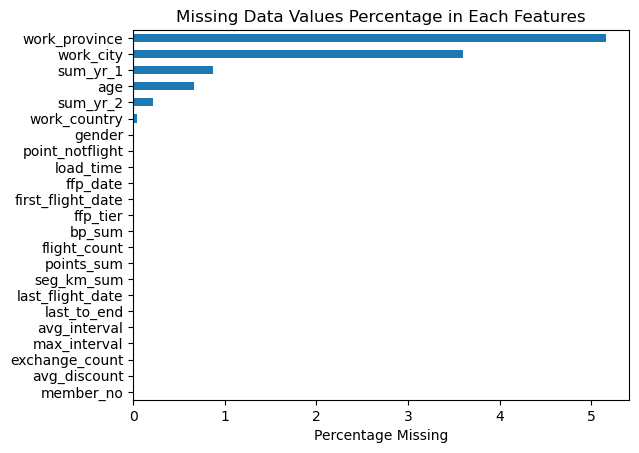

In [11]:
#Visualize percentage of missing values in each features
df_percentage_missing = df.isna().sum()/df.shape[0] * 100
df_percentage_missing = df_percentage_missing.sort_values()
df_percentage_missing.plot(kind='barh')
plt.title('Missing Data Values Percentage in Each Features')
# plt.ylabel('Features')
plt.xlabel('Percentage Missing')
plt.show()

In [12]:
#Additional to missing features representation
df_percentage_missing = df_percentage_missing[df_percentage_missing > 0]
df_percentage_missing = df_percentage_missing.sort_values(ascending=False)
df_percentage_missing

work_province    5.156538
work_city        3.602273
sum_yr_1         0.874770
age              0.666794
sum_yr_2         0.219089
work_country     0.041278
gender           0.004763
dtype: float64

namun dalam hal ini tidak semua missing values akan di-drop (alasan dibawah)

In [13]:
# menghitung persentase missing values yg akan di-drop
df[['gender', 'work_country', 'age', 'sum_yr_1', 'sum_yr_2']].isnull().sum().sum()/df.shape[0]*100

1.806693338413666

In [14]:
# drop missing values from specific columns
df = df.dropna(subset=['gender', 'work_country', 'age', 'sum_yr_1', 'sum_yr_2'])

In [15]:
# convert object to datetime & convert float to int
df['ffp_date'] = pd.to_datetime(df['ffp_date'])
df['load_time'] = pd.to_datetime(df['load_time'])
df[['age', 'sum_yr_1', 'sum_yr_2']] = df[['age', 'sum_yr_1', 'sum_yr_2']].astype(int)

In [16]:
# df.info() after cleaning
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 61856 entries, 0 to 62986
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   member_no          61856 non-null  int64         
 1   ffp_date           61856 non-null  datetime64[ns]
 2   first_flight_date  61856 non-null  object        
 3   gender             61856 non-null  object        
 4   ffp_tier           61856 non-null  int64         
 5   work_city          59701 non-null  object        
 6   work_province      58747 non-null  object        
 7   work_country       61856 non-null  object        
 8   age                61856 non-null  int32         
 9   load_time          61856 non-null  datetime64[ns]
 10  flight_count       61856 non-null  int64         
 11  bp_sum             61856 non-null  int64         
 12  sum_yr_1           61856 non-null  int32         
 13  sum_yr_2           61856 non-null  int32         
 14  seg_km_sum 

- Beberapa column yang berisi nilai tanggal bertipe data object (ffp_date, first_flight_date, load_time).
- Beberapa column yang berisi nilai bilangan bulat bertipe data float (age, sum_yr_1, sum_yr_2).
- Tidak ada duplicated values
- Untuk column work_city & work_province banyak nilai yang tidak konsisten berupa karakter titik, garis miring, spasi, 1 huruf, dll.
- Untuk column last_flight_date format penanggalan tidak konsisten, kalaupun dilakukan pemrosesan untuk meng-convert dikhawatirkan akan menghasilkan informasi yang salah, contohnya pada value '9/2/2013' tidak diketahui mana yang tanggal & bulan pada value tersebut.
- Column load_time berisi hanya nilai '3/31/2014'
- Terdapat missing values pada 7 column, antara lain: gender, work_city, work_province, work_country, age, sum_yr_1, sum_yr_2
- Treatment drop untuk missing value dilakukan untuk semua column dengan missing values diluar column work_city & work_province karena dinilai column work_city & work_province tidak memiliki kepentingan untuk diubah karena terlalu kotor.

## b. Keluarkan statistik kolom baik numerik maupun kategorikal, cari bentuk distribusi setiap kolom (numerik), dan jumlah baris untuk setiap unique value (kategorikal)

In [17]:
df.describe().transpose()

count                           mean                  min  \
member_no        61856.0                   31489.315943                  2.0   
ffp_date           61856  2010-03-08 14:31:05.183652352  2004-11-01 00:00:00   
ffp_tier         61856.0                        4.10345                  4.0   
age              61856.0                      42.491108                  6.0   
load_time          61856            2014-03-31 00:00:00  2014-03-31 00:00:00   
flight_count     61856.0                      11.964401                  2.0   
bp_sum           61856.0                   11041.484739                  0.0   
sum_yr_1         61856.0                    5374.941558                  0.0   
sum_yr_2         61856.0                    5662.081399                  0.0   
seg_km_sum       61856.0                   17303.810027                368.0   
last_to_end      61856.0                     172.606942                  1.0   
avg_interval     61856.0                      68.154935                  0.0   
max_interval     61856.0                     167.461556                  0.0   
exchange_count   61856.0                       0.324188                  0.0   
avg_discount     61856.0                       0.721649                  0.0   
points_sum       61856.0                   12681.680953                  0.0   
point_notflight  61856.0                       2.759425                  0.0   

                                 25%                  50%  \
member_no                   15714.75              31486.5   
ffp_date         2008-04-14 00:00:00  2010-10-11 00:00:00   
ffp_tier                         4.0                  4.0   
age                             35.0                 41.0   
load_time        2014-03-31 00:00:00  2014-03-31 00:00:00   
flight_count                     3.0                  7.0   
bp_sum                        2591.0               5800.5   
sum_yr_1                      1020.0               2816.0   
sum_yr_2                       833.0               2826.5   
seg_km_sum                   4866.75              10183.0   
last_to_end                     29.0                105.0   
avg_interval                   23.75                 45.0   
max_interval                    81.0                144.0   
exchange_count                   0.0                  0.0   
avg_discount                 0.61265             0.711827   
points_sum                   2847.75               6442.0   
point_notflight                  0.0                  0.0   

                                 75%                  max           std  
member_no                   47259.25              62988.0   18192.01412  
ffp_date         2012-03-29 00:00:00  2013-03-31 00:00:00           NaN  
ffp_tier                         4.0                  6.0      0.375833  
age                             48.0                110.0      9.887556  
load_time        2014-03-31 00:00:00  2014-03-31 00:00:00           NaN  
flight_count                    15.0                213.0     14.116064  
bp_sum                      12975.25             505308.0   16394.47591  
sum_yr_1                      6600.0             239560.0   8123.952607  
sum_yr_2                      6912.0             234188.0   8702.731851  
seg_km_sum                   21497.5             580717.0  21040.271177  
last_to_end                    260.0                731.0     181.23437  
avg_interval                    82.5                728.0     77.684101  
max_interval                   229.0                728.0    123.155015  
exchange_count                   0.0                 46.0      1.143987  
avg_discount                0.808825                  1.5      0.184792  
points_sum                  14457.25             985572.0  20597.492952  
point_notflight                  1.0                140.0       7.40624

In [18]:
df.select_dtypes(object).describe().transpose()

count unique        top   freq
first_flight_date  61856   3405  2/16/2013     92
gender             61856      2       Male  47298
work_city          59701   3198  guangzhou   9324
work_province      58747   1153  guangdong  17357
work_country       61856    117         CN  56733
last_flight_date   61856    731  3/31/2014    956

In [48]:
cats = ['gender', 'work_city', 'work_province', 'work_country']
for col in cats :
    print(df[col].value_counts())
    print()

gender
Male      36615
Female    11572
Name: count, dtype: int64

work_city
guangzhou        6893
beijing          6253
shanghai         3834
shenzhen         2822
dalian           1496
                 ... 
DENPASAR            1
tao?shi             1
PRATO               1
MONTEKEY PARK       1
lingshui            1
Name: count, Length: 2624, dtype: int64

work_province
guangdong    13107
beijing       6224
shanghai      3815
liaoning      3073
xinjiang      1864
             ...  
GUNMA            1
Colorado         1
JOHOV            1
TOSCANA          1
JAWATIMUR        1
Name: count, Length: 932, dtype: int64

work_country
CN    44321
HK      800
KR      636
JP      608
US      357
      ...  
AT        1
AB        1
UY        1
TK        1
SA        1
Name: count, Length: 99, dtype: int64



In [19]:
nums = ['ffp_tier', 'age', 'flight_count', 'bp_sum', 'sum_yr_1', 'sum_yr_2', 'seg_km_sum',
       'last_to_end', 'avg_interval', 'max_interval', 'exchange_count', 'avg_discount', 
       'points_sum', 'point_notflight']

In [20]:
len(df[nums].columns)

14

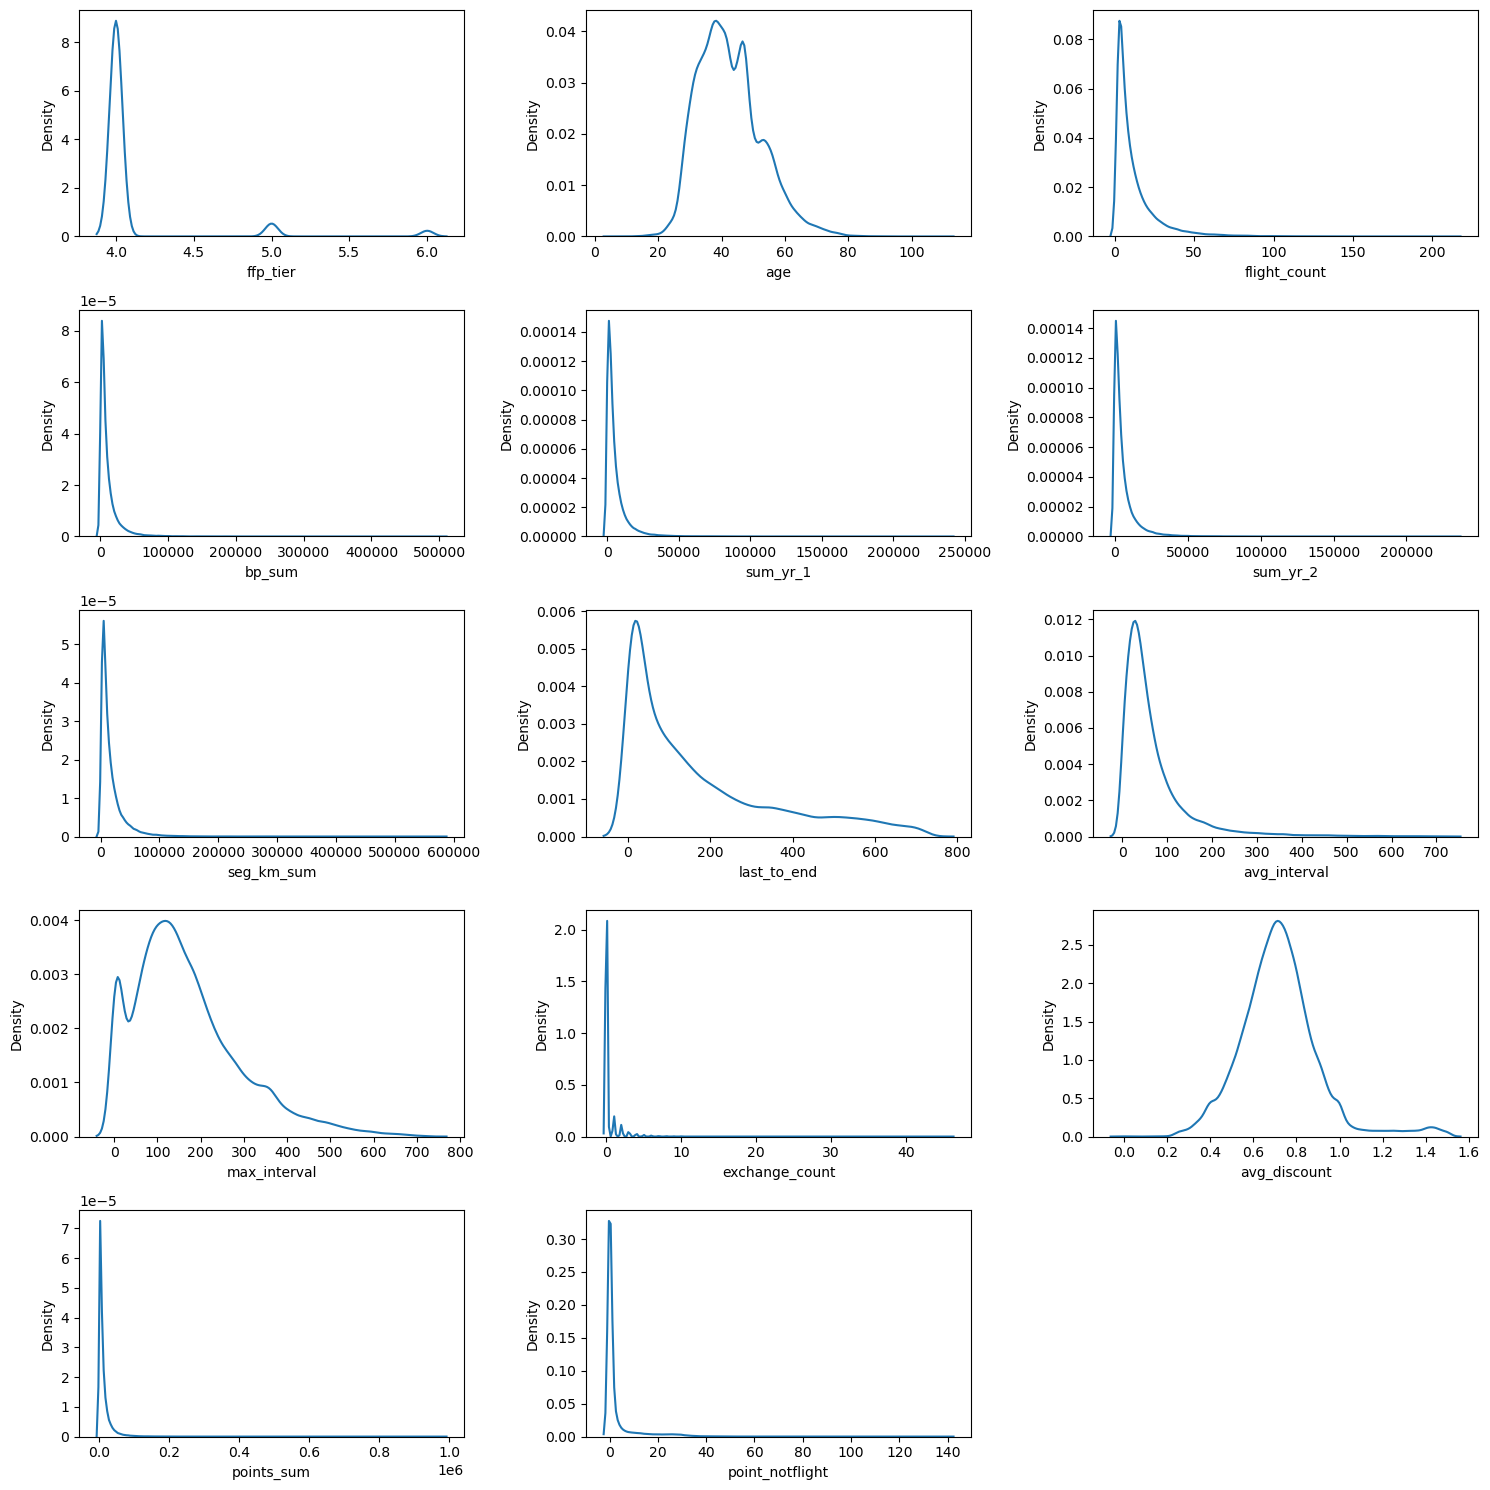

In [21]:
# Kdeplot
plt.figure(figsize = (15,15))
for i in range(len(nums)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x = df[nums[i]])
    plt.tight_layout()

- Semua column numerik distribusinya berbentuk righ-skewed distribution/positively-skewed kecuali column avg_discount, namun avg_discount ini banyak average discount yang > 1 (100%), dan hal ini sebenarnya dianggap tidak valid, maka nanti akan di drop
- Total nilai unik untuk masing-masing column kategorikal antara lain:
    <pre>
    first_flight_date    3405
    gender                  2
    work_city            3198
    work_province        1153
    work_country          117
    last_flight_date      731</pre>

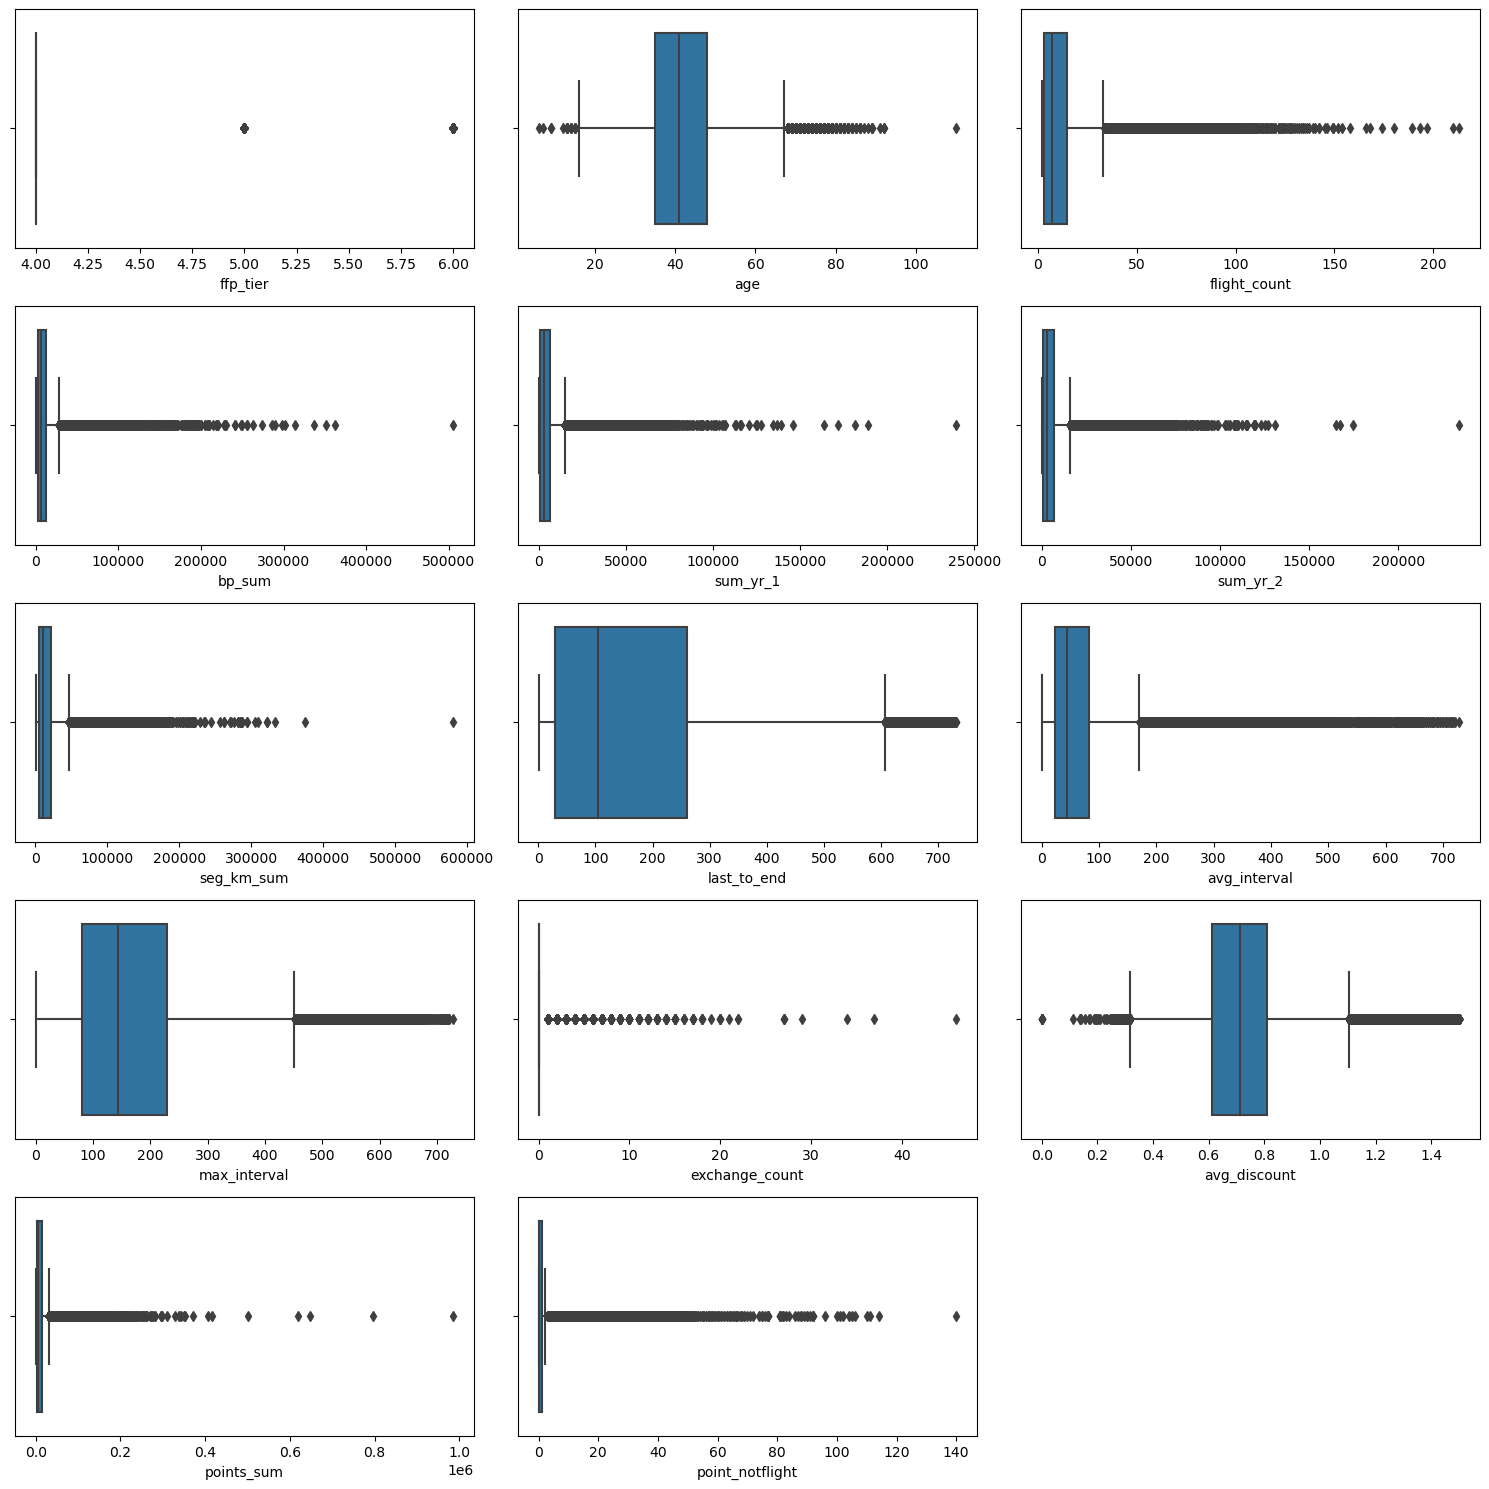

In [22]:
# Boxplot
plt.figure(figsize = (15,15))
for i in range(len(nums)):
    plt.subplot(5, 3, i+1)
    sns.boxplot(x = df[nums[i]])
    plt.tight_layout()

Terdapat banyak sekali outliers yang nantinya akan di drop menggunakan metode IQR karena distribusi yang tidak normal

## c. Cari tahu apakah ada kolom-kolom yang berkorelasi kuat satu sama lain

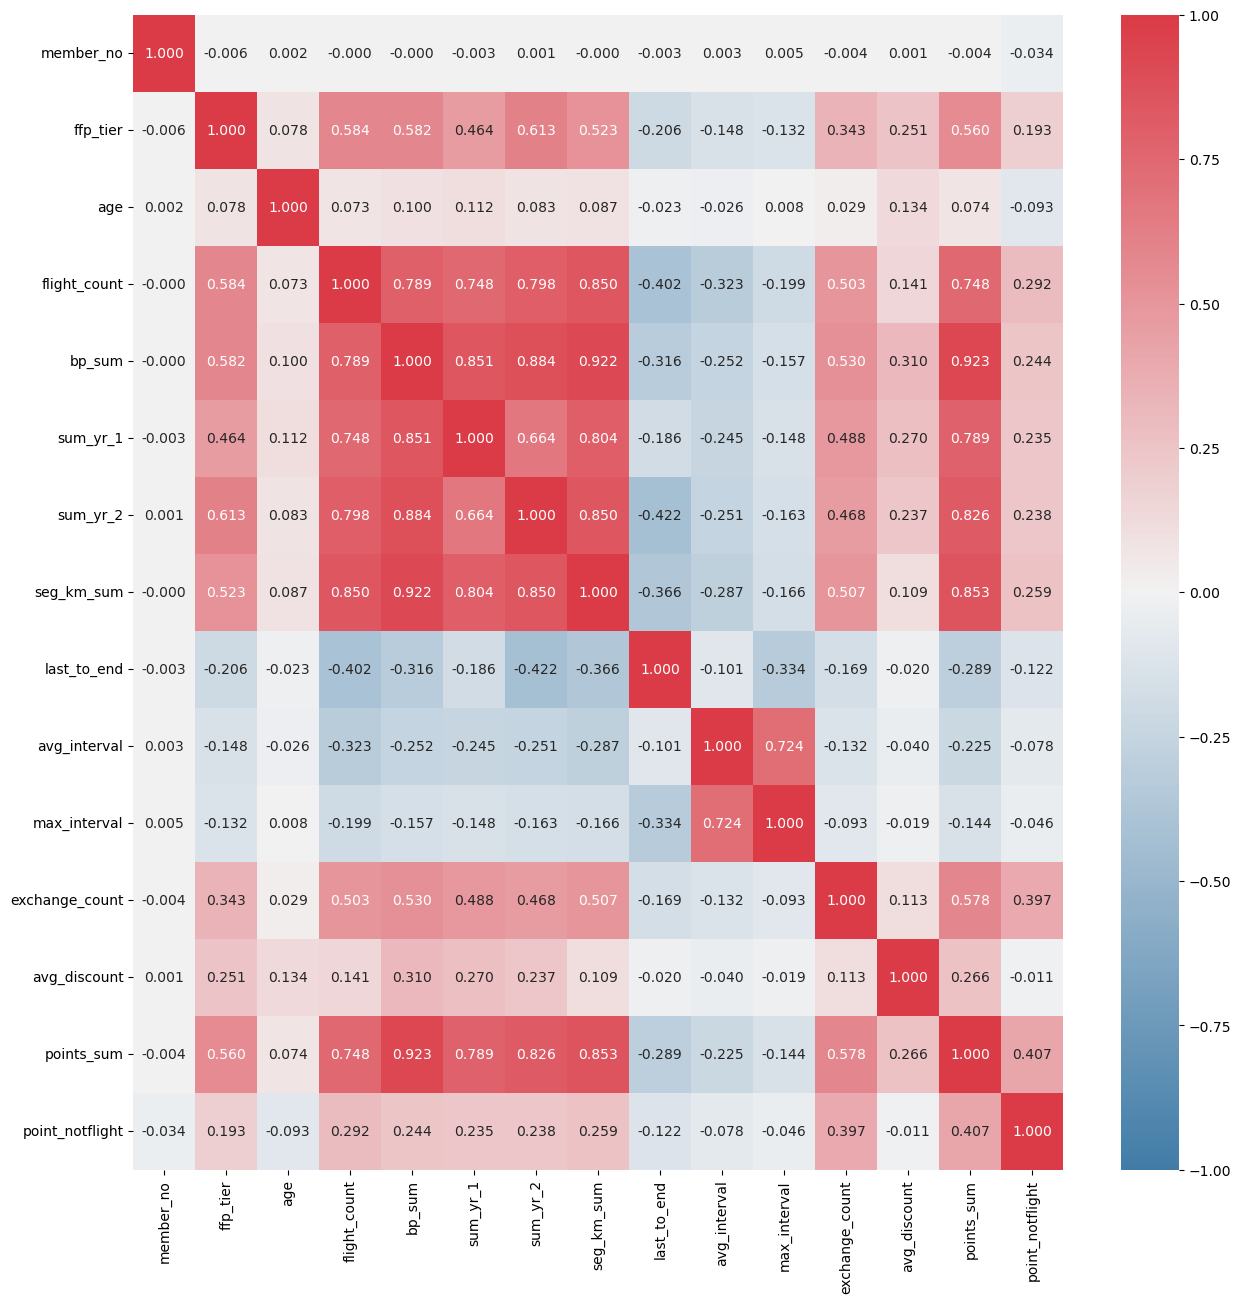

In [23]:
# Heatmap
plt.figure(figsize=(15,15))
cmap_custom = sns.diverging_palette(240, 10, as_cmap=True)
sns.heatmap(data = df.corr(numeric_only=True), cmap=cmap_custom, annot=True, fmt='.3f', vmin=-1, vmax=1)
plt.show()

- Kolom yang berkorelasi kuat (sama dengan/di atas 0.3): 
    - ffp_tier dengan flight_count, bp_sum, sum_yr_1, sum_yr_2, seg_km_sum, exchange_count, points_sum
    - flight_count dengan bp_sum,  sum_yr_1, sum_yr_2, seg_km_sum, last_to_end, avg_interval, exchange_count, points_sum
    - bp_sum dengan sum_yr_1, sum_yr_2, seg_km_sum, last_to_end, exchange_count, avg_discount, poins_sum
    - sum_yr_1 dengan sum_yr_2, seg_km_sum, exchange_count, points_sum
    - sum_yr_2 dengan seg_km_sum, last_to_end, exchange_count, points_sum
    - seg_km_sum dengan last_to_end, exchange_count, points_sum
    - last_to_end dengan max_interval
    - avg_interval dengan max_interval
    - exchange_count dengan points_sum, point_notflight
    - points_sum dengan point_notflight
<br/><br/>
 - Kolom dengan high multicollinearity (sama dengan/di atas 0.7):
    - flight_count dengan bp_sum,  sum_yr_1, sum_yr_2, seg_km_sum, points_sum
    - bp_sum dengan sum_yr_1, sum_yr_2, seg_km_sum, poins_sum    
    - sum_yr_1 dengan seg_km_sum, points_sum
    - sum_yr_2 dengan seg_km_sum, points_sum
    - avg_interval dengan max_interval

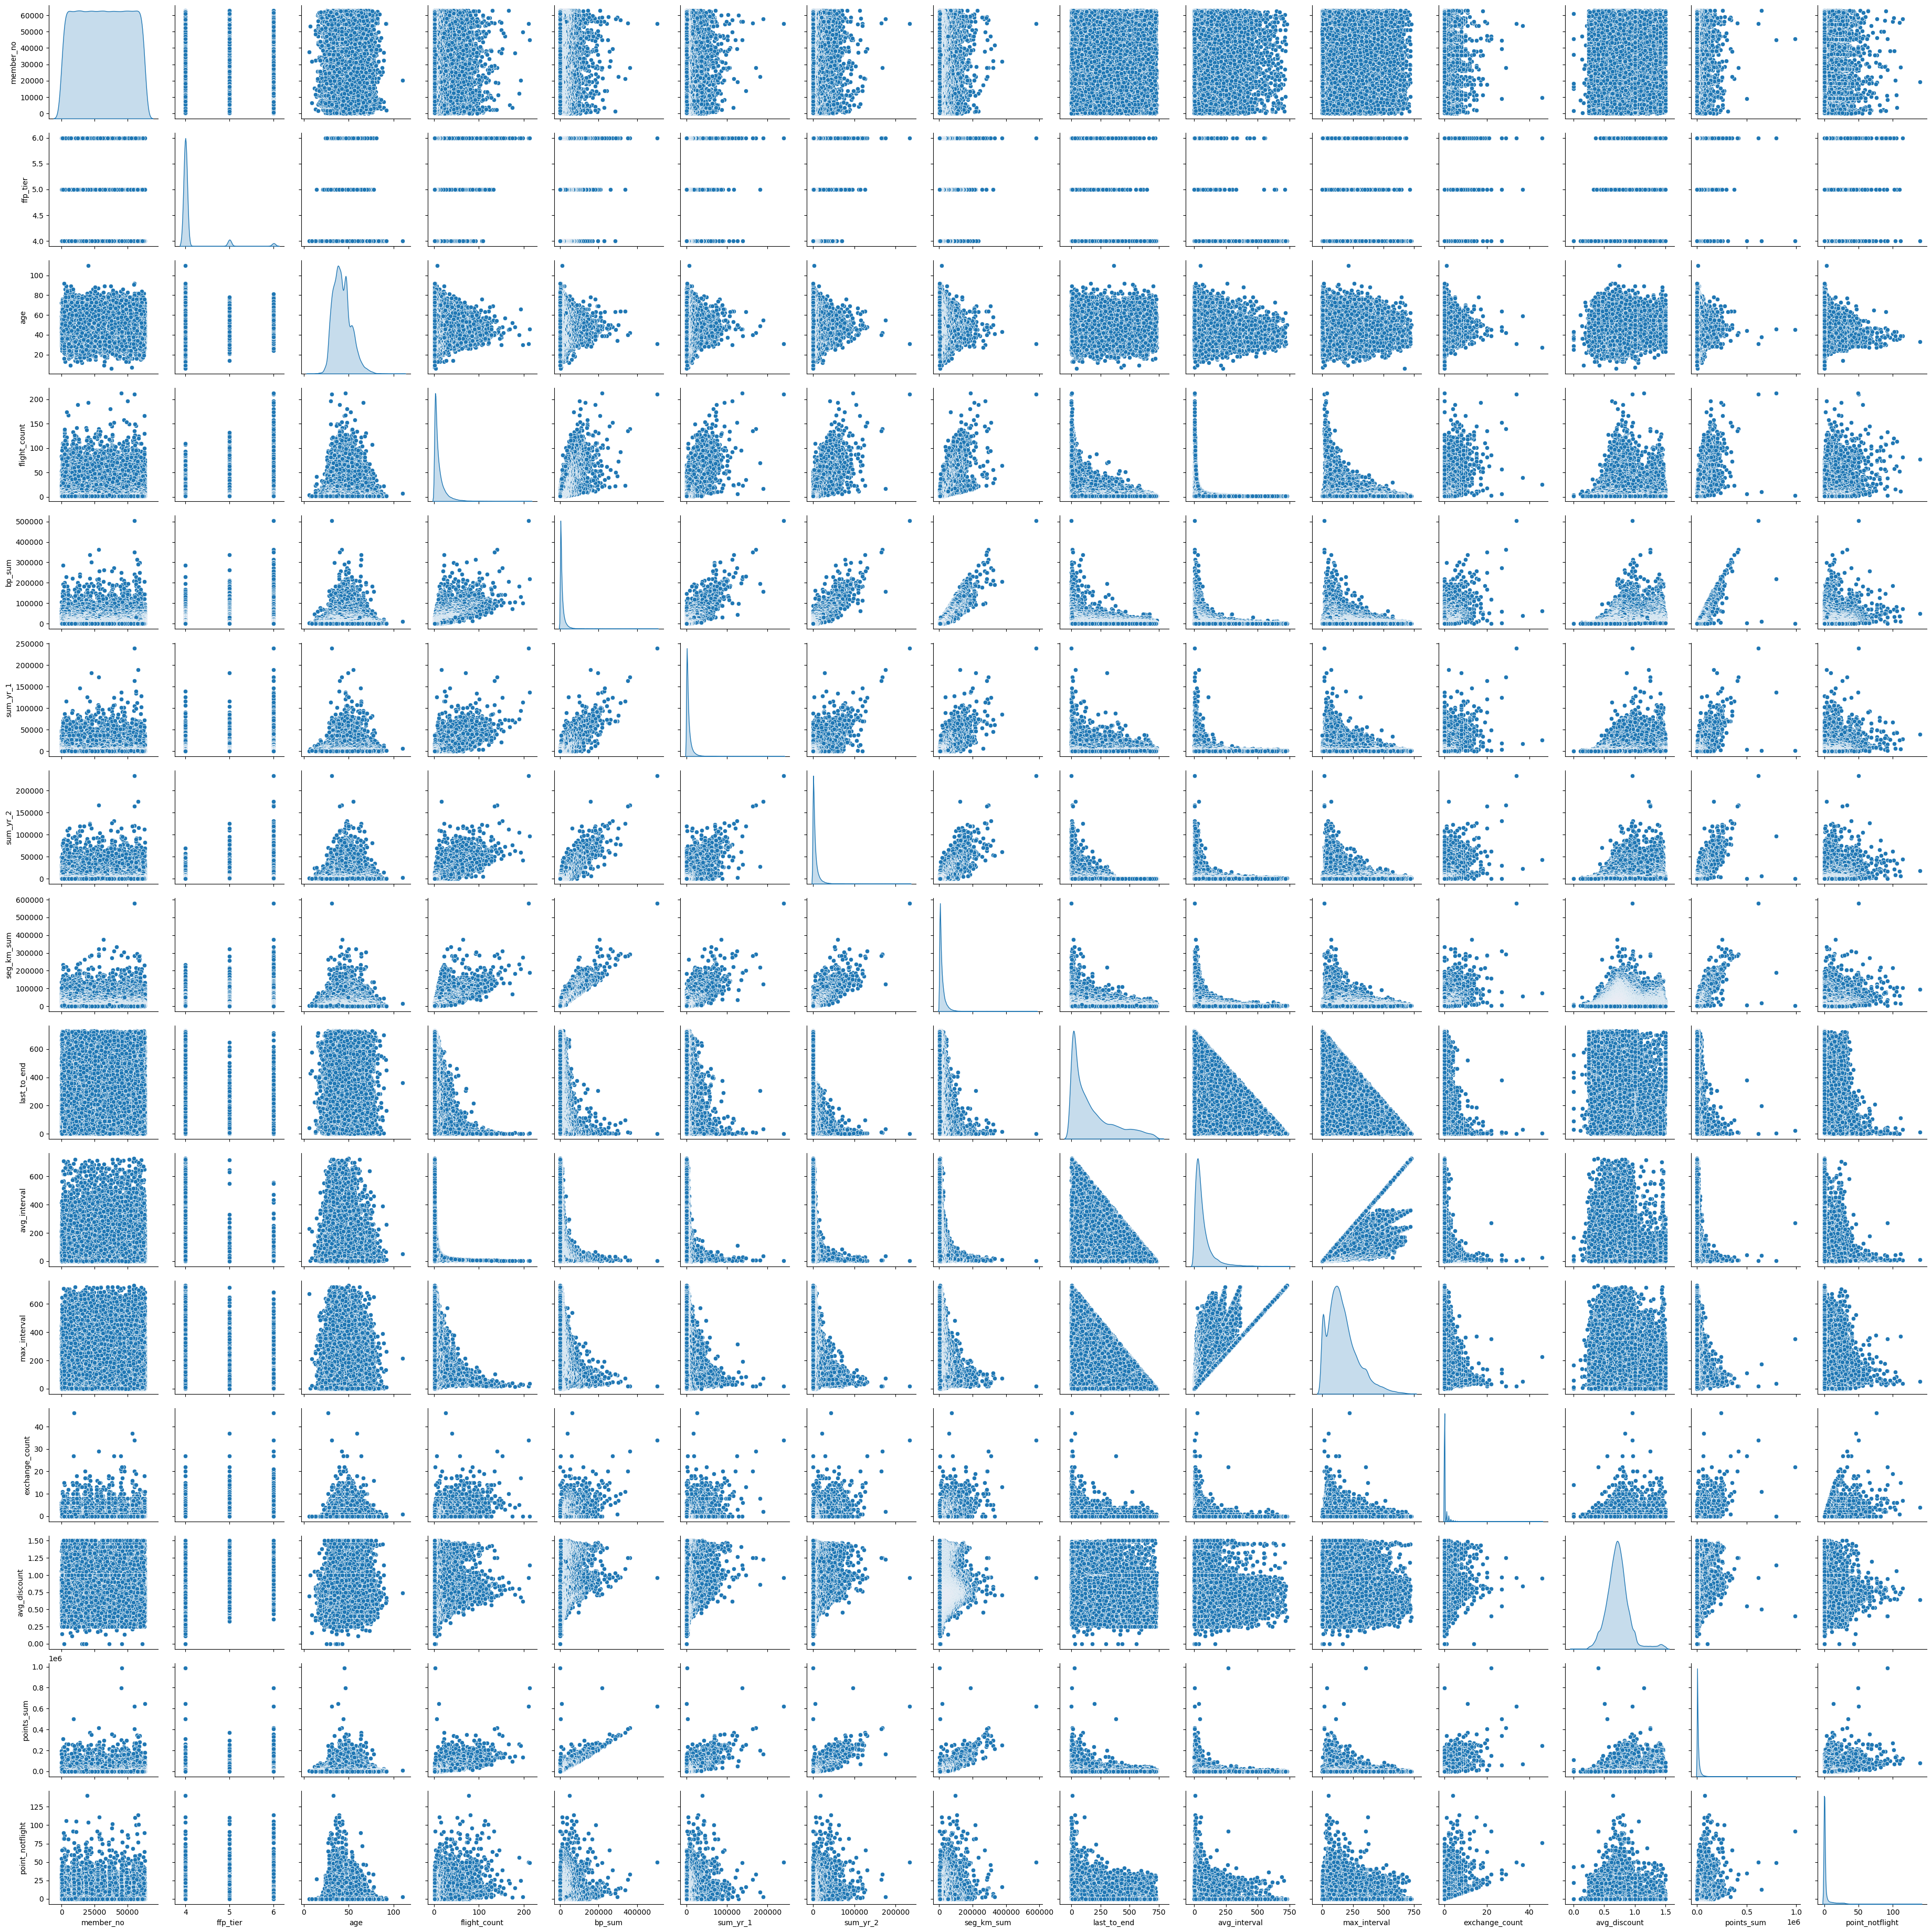

In [24]:
# # Pairplot sebelum clustering
# sns.pairplot(data=df, diag_kind='kde')
# plt.show()

# 2. Pilih fitur-fitur yang menurut teman-teman masuk akal secara bisnis untuk digunakan sebagai fitur clustering. Lakukan feature engineering!

## a. Dari sekian banyak kolom yang ada, tentukan 3-6 fitur untuk digunakan sebagai fitur clustering. Tulis alasan teman-teman memilih fitur tersebut.

Fitur yang akan dipilih antara lain last_to_end, flight_count, avg_interval, bp_sum, & points_sum. Alasan mengapa memilih fitur-fitur tersebut karena fitur-fitur tersebut dapat dikaitkan dengan konsep RFM (Recency, Frequency, & Monetary). Selain itu juga memenuhi syarat korelasi yang tinggi antar satu sama lain.
- Recency: last_to_end
- Frequency: flight_count, avg_interval
- Monetary: bp_sum, points_sum

## b. Lakukan preprocessing dan feature engineering (apabila fitur yang teman-teman pilih merupakan fitur baru yang dihasilkan dari fitur-fitur yang sudah ada).


Pertimbangan dalam menggunakan metode penghitungan IQR dalam me-remove outlier adalah karena bentuk persebaran data menceng/tidak normal.

In [25]:
# preprocessing remove outlier
selected_features = ['last_to_end', 'flight_count', 'avg_interval', 'bp_sum', 'points_sum']
print(f'Jumlah baris sebelum memfilter outlier: {len(df)}')

filtered_entries = np.array([True] * len(df))
for col in selected_features:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    low_limit = Q1 - (IQR * 1.5)
    high_limit = Q3 + (IQR * 1.5)

    filtered_entries = ((df[col] >= low_limit) & (df[col] <= high_limit)) & filtered_entries
    
df = df[filtered_entries]

print(f'Jumlah baris setelah memfilter outlier: {len(df)}')

Jumlah baris sebelum memfilter outlier: 61856
Jumlah baris setelah memfilter outlier: 48187


In [26]:
# preprocessing standardization
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
df_std = ss.fit_transform(df[selected_features])

In [27]:
# Standardized df
pd_df_std = pd.DataFrame(df_std, columns=selected_features)
pd_df_std.sample(5)

last_to_end  flight_count  avg_interval    bp_sum  points_sum
3835     -0.155447      0.968613     -0.477846  1.689766    1.452630
4714     -1.040087      2.544212     -0.740850  1.439370    1.221653
35513    -0.179851     -0.893459     -1.427385 -0.659758   -0.645826
12187    -0.783847      0.252431      0.052211  0.595939    1.413587
16090    -0.106639      0.252431     -0.021506  0.183189    0.062898

# 3. Lakukan clustering K-means! Temukan jumlah cluster yang menurut teman-teman optimal dan evaluasi cluster yang dihasilkan dengan visualisasi dan silhouette score

## a. Temukan jumlah cluster yang optimal dengan menggunakan elbow method

<Axes: >

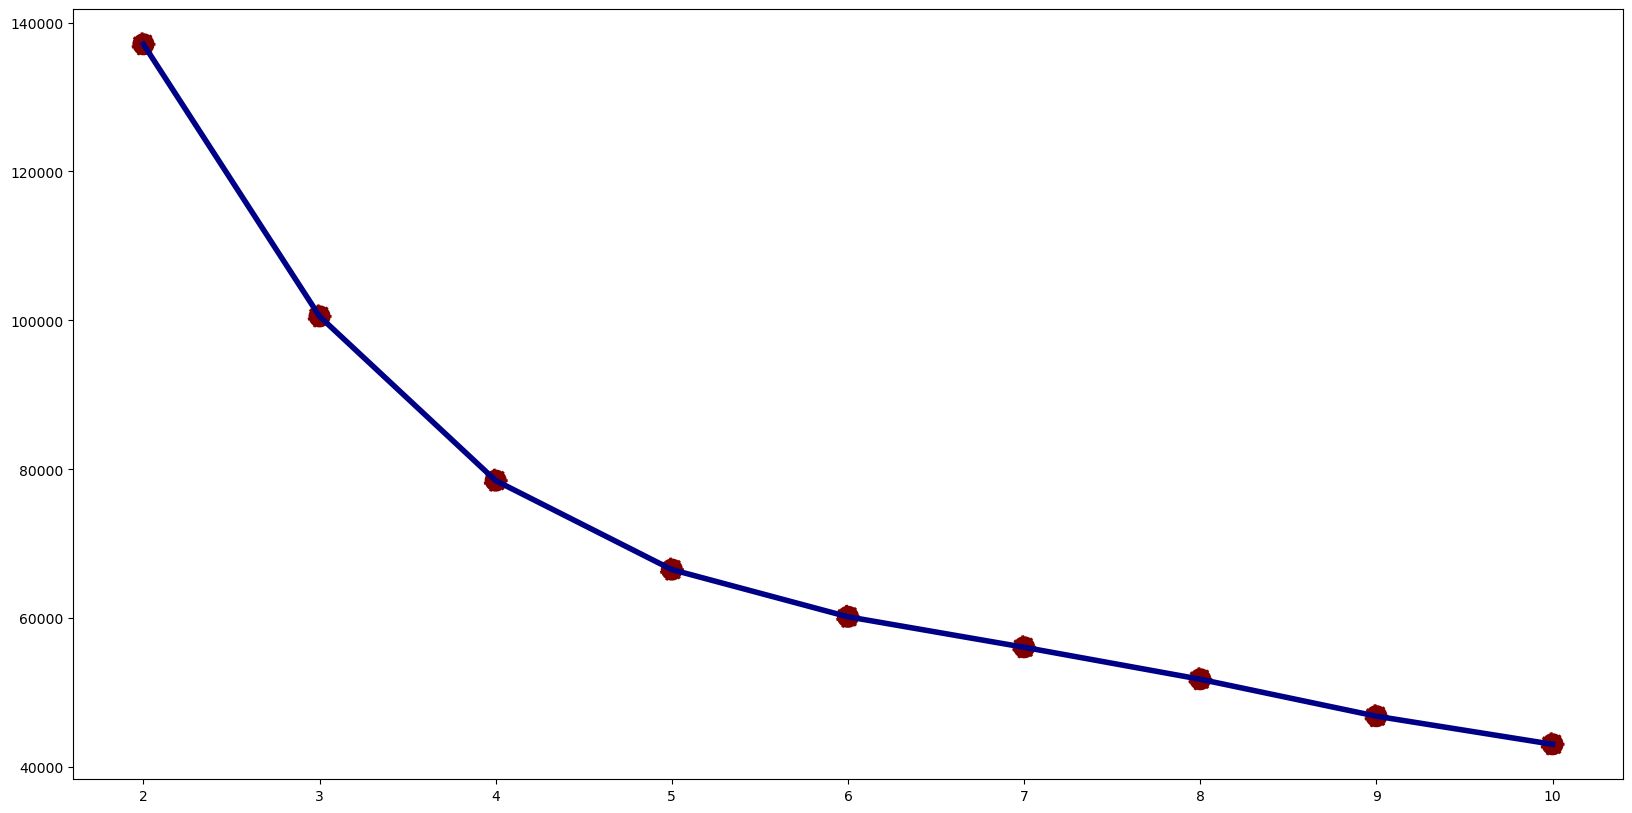

In [28]:
# elbow method
from sklearn.cluster import KMeans
inertia = []

for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=4)
    kmeans.fit(df_std)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(20, 10))
# plt.plot(inertia)

sns.lineplot(x=range(2, 11), y=inertia, color='#000087', linewidth = 4)
sns.scatterplot(x=range(2, 11), y=inertia, s=300, color='#800000',  linestyle='--')

In [29]:
#list inertia
inertia

[137086.06931254992,
 100540.84648086797,
 78483.44658515962,
 66535.24993352382,
 60193.95243732,
 56099.31347215227,
 51804.26260808095,
 46842.22181228822,
 43070.694449046685]

In [30]:
# Pengurangan inertia dalam persen
(pd.Series(inertia) - pd.Series(inertia).shift(-1)) / pd.Series(inertia) * 100

0    26.658597
1    21.938745
2    15.223843
3     9.530734
4     6.802409
5     7.656156
6     9.578441
7     8.051555
8          NaN
dtype: float64

In [31]:
# silhouette score
from sklearn.metrics import silhouette_score

# arr_silhouette_score_mahalanobis = []
arr_silhouette_score_euclidean = []
for i in list(range(2,11)):
    kmeans = KMeans(n_clusters=i).fit(df_std)
    preds = kmeans.predict(df_std)
    
    # score_mahalanobis = silhouette_score(df_std, preds, metric='mahalanobis')
    # arr_silhouette_score_mahalanobis.append(score_mahalanobis)
    
    score_euclidean = silhouette_score(df_std, preds, metric='euclidean')
    arr_silhouette_score_euclidean.append(score_euclidean)

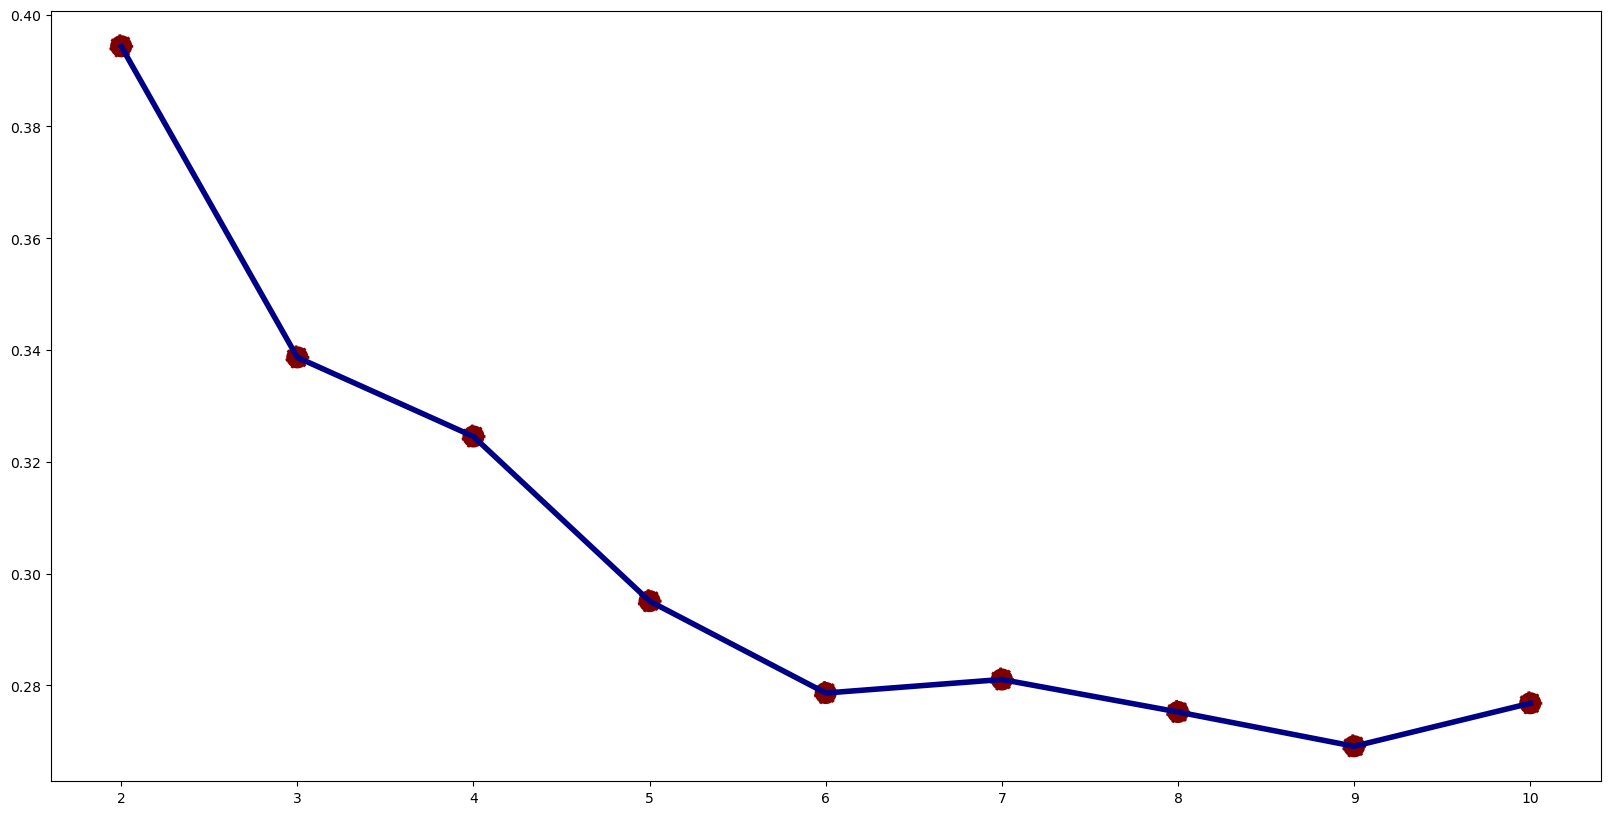

In [32]:
# visualize silhouette score
fig, ax = plt.subplots(figsize=(20, 10))

#using euclidean
sns.lineplot(x=range(2,11), y=arr_silhouette_score_euclidean, color='#000087', linewidth = 4)
sns.scatterplot(x=range(2,11), y=arr_silhouette_score_euclidean, s=300, color='#800000',  linestyle='--')

# #using mahalanobis
# sns.lineplot(x=range(2,11), y=arr_silhouette_score_mahalanobis, color='#000087', linewidth = 4)
# sns.scatterplot(x=range(2,11), y=arr_silhouette_score_mahalanobis, s=300, color='#800000',  linestyle='--')

plt.show()

In [33]:
# Pengurangan silhouette score dalam persen
(pd.Series(arr_silhouette_score_euclidean) - pd.Series(arr_silhouette_score_euclidean).shift(-1)) / pd.Series(arr_silhouette_score_euclidean) * 100

0    14.113440
1     4.178237
2     9.076752
3     5.570916
4    -0.869477
5     2.067777
6     2.229856
7    -2.860472
8          NaN
dtype: float64

## b. Lakukan clustering menggunakan K-means

In [34]:
kmeans = KMeans(n_clusters=3, random_state=4).fit(df_std)

In [35]:
pd_df_std['clusters'] = kmeans.labels_
df['clusters'] = kmeans.labels_

In [36]:
df[pd_df_std.columns].head(5)

last_to_end  flight_count  avg_interval  bp_sum  points_sum  clusters
1448           23             8     52.285714   13956       13956         1
1839           81             6    111.200000   27912       27912         1
1970           90             6     92.400000   27912       27912         1
2215          202             6     98.000000   27912       27912         1
2275            7             6    101.400000   27912       27912         1

In [37]:
pd_df_std.head(5)

last_to_end  flight_count  avg_interval    bp_sum  points_sum  clusters
0    -0.905866     -0.177277     -0.103497  1.029851    0.843896         1
1    -0.552010     -0.463750      1.447559  3.284386    2.923575         1
2    -0.497101     -0.463750      0.952605  3.284386    2.923575         1
3     0.186207     -0.463750      1.100038  3.284386    2.923575         1
4    -1.003481     -0.463750      1.189551  3.284386    2.923575         1

## c. Evaluasi cluster yang dihasilkan dengan menggunakan visualisasi, gunakan PCA apabila diperlukan

karena feature yang digunakan ada 5 maka harus memakai PCA dalam visualisasi 2D agar lebih mudah dilihat

In [38]:
from sklearn.decomposition import PCA 
pca = PCA(n_components=2)

pca.fit(df_std)
pcs = pca.transform(df_std)

data_pca = pd.DataFrame(data = pcs, columns = ['PC 1', 'PC 2'])
data_pca['clusters'] = pd_df_std['clusters']
data_pca.head(5)

PC 1      PC 2  clusters
0  1.223663  0.458543         1
1  2.981707  1.384301         1
2  3.068076  0.963852         1
3  2.824684  0.652114         1
4  3.176086  1.464975         1

<Axes: xlabel='PC 1', ylabel='PC 2'>

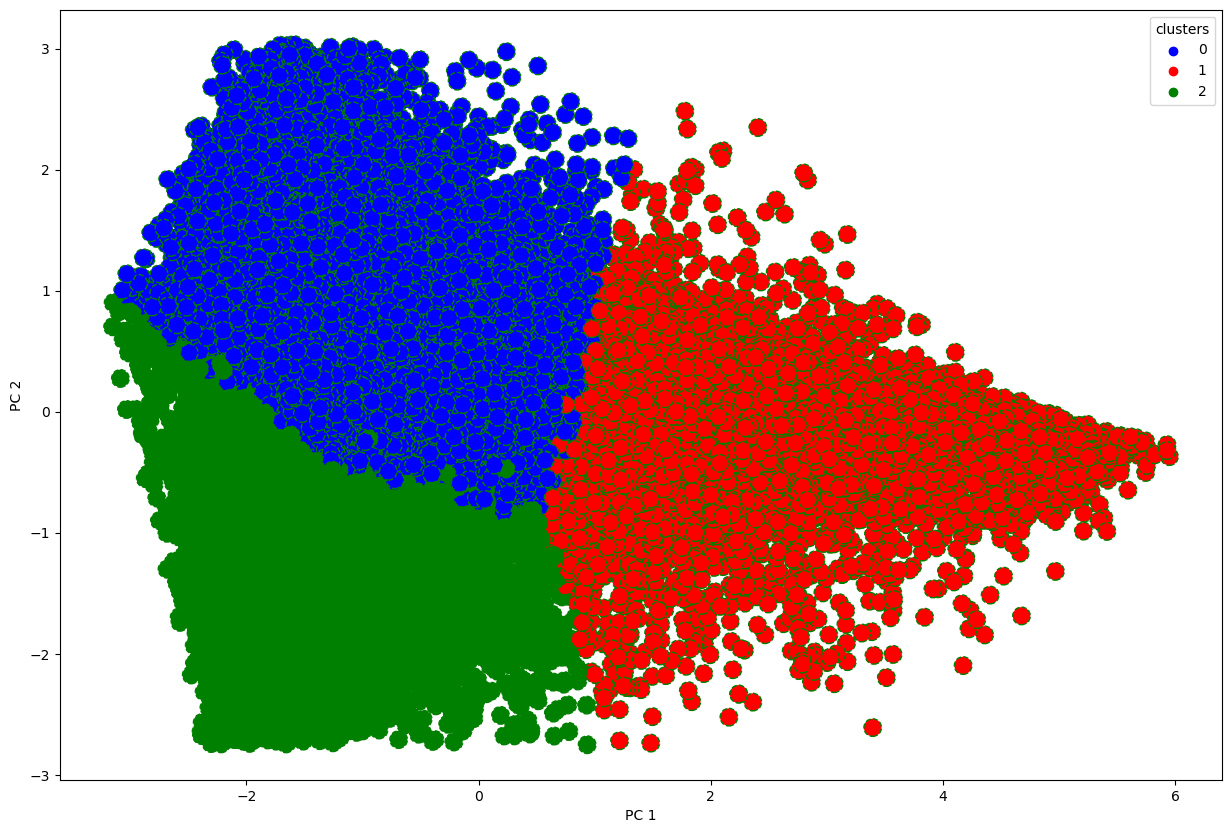

In [39]:
fig, ax = plt.subplots(figsize=(15, 10))

sns.scatterplot(
    x="PC 1", y="PC 2",
    hue="clusters",
    edgecolor='green',
    linestyle='--',
    data=data_pca,
    palette=['blue','red','green','black'],
    s=160,
    ax=ax
)

# 4. Interpretasi cluster yang dihasilkan secara bisnis dan berikan rekomendasi yang sesuai dengan cluster yang dihasilkan

## a. Tempelkan kembali label yang dihasilkan ke dataframe asal, dan keluarkan statistik fitur dari setiap cluster

In [40]:
display(df[pd_df_std.columns].groupby('clusters').agg(['mean','median']))

last_to_end        flight_count        avg_interval             \
                mean median         mean median         mean     median   
clusters                                                                  
0         110.925747   91.0     6.792455    6.0    80.531036  74.387500   
1          74.432759   42.0    18.113025   17.0    35.955476  33.544231   
2         386.548262  396.0     4.198071    3.0    33.393931  28.000000   

                bp_sum             points_sum           
                  mean   median          mean   median  
clusters                                                
0          5094.787060   4746.5   5662.773925   5201.0  
1         15733.258537  14847.5  16965.909943  15999.5  
2          3392.341276   2652.0   3809.313478   2888.0

## b. Deskripsikan secara kontekstual customer seperti apa yang ada di masing-masing cluster

- Cluster 0: Customer yang jarang menggunakan layanan, jumlah point yang diterima sedikit, & terakhir menggunakan layanan dari tanggal data diambil paling lama.
- Cluster 2: Customer yang frekuensi penerbangannya sedang, jumlah point yang diterima sedang, & terakhir menggunakan layanan dari tanggal data diambil jaraknya sedang.
- Cluster 1: Customer yang sering menggunakan layanan, jumlah point yang diterima tinggi, & terakhir menggunakan layanan dari tanggal data diambil paling dekat.

## c. Berdasarkan cluster tersebut, berikan 1-2 rekomendasi bisnis

Secara garis besar dapat dilakukan 2 rekomendasi berikut ini :
1.  Membuat campaign khusus untuk masing-masing segment customer, karena setiap segment memiliki pola behavior yang berbeda.
2.  Melakukan follow-up reaksi dari masing-masing segment terkait campaign/treatment yang dilakukan untuk nantinya terus melakukan perbaikan layanan masing-masing segment.

Secara spesifik pada cluster tertentu dapat dilakukan rekomendasi berikut ini :

-  **Cluster 0: Customer yang jarang menggunakan layanan**
   - Rekomendasi Bisnis: Melakukan analisis lebih lanjut untuk memahami alasan di balik frekuensi penggunaan yang rendah. Mungkin diperlukan strategi pemasaran atau penawaran khusus untuk meningkatkan keterlibatan mereka, seperti diskon khusus, program loyalitas, atau promosi yang dapat menarik minat mereka.

-  **Cluster 2: Customer yang frekuensi penerbangannya sedang**
   - Rekomendasi Bisnis: Menyusun program loyalitas atau penawaran khusus untuk meningkatkan keterlibatan dan frekuensi penggunaan layanan. Memberikan insentif atau keuntungan tambahan bagi pelanggan dalam kategori ini dapat merangsang mereka untuk lebih aktif menggunakan layanan.

-  **Cluster 1: Customer yang sering menggunakan layanan**
   - Rekomendasi Bisnis: Memberikan penghargaan atau insentif khusus kepada pelanggan dalam kategori ini sebagai bentuk pengakuan terhadap loyalitas mereka. Melibatkan mereka dalam program loyalitas yang eksklusif atau memberikan keuntungan tambahan dapat memperkuat hubungan bisnis dan memastikan retensi pelanggan yang tinggi.